# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Partho Protim | Das | Partho | 5 | 25 |
| Member 2: | Rony | Paul | Rony | 5 | 25 |
| Member 3: | Shakil | Ahmed | Shakil | 5 | 25 |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
from google.colab import drive
drive.mount('/content/drive')
# uncomment and compelete below
cv_set = pd.read_csv("/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv")

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv("/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv")

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv("/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv")

Mounted at /content/drive


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [3]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [7]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [11]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [12]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Hyperparameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Hyperparameter gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

In [13]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [14]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.score(X_test, y_test)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.95
Best cross-validation validation score: 0.96
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

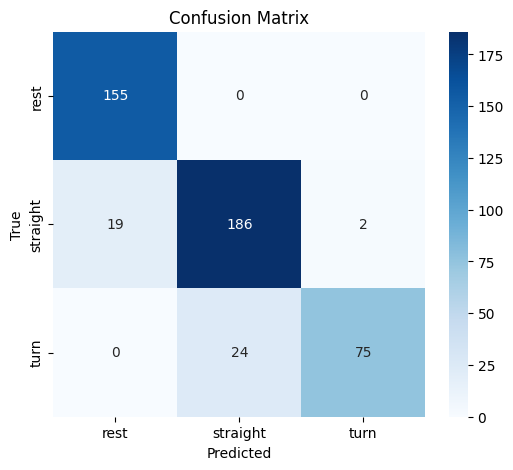

Classification Report:
               precision    recall  f1-score   support

        rest       0.89      1.00      0.94       155
    straight       0.89      0.90      0.89       207
        turn       0.97      0.76      0.85        99

    accuracy                           0.90       461
   macro avg       0.92      0.89      0.90       461
weighted avg       0.91      0.90      0.90       461



In [15]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to 'plt'
import seaborn as sns

pipe.fit(X_train, y_train) # This line is crucial to fit the StandardScaler

y_pred = pipe.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The dataset and the model fit each other very well such as,

  *   The model performs effectively in generalizing across the training data, as shown by the extremely high cross-validation train score (0.95) and validation score (0.96).
  *   The model performs well on unknown data and is neither overfitting nor underfitting, as seen by the test-set score (0.96) being consistent with the validation score.
2.  For **C**,
  *   The tested range, [0.01, 0.1, 1, 10, 100], balances underfitting and overfitting by containing a wide range of values from small to large and it is slightly suitable.. Because the best value of **C** is 100 which lies at the edge of the search space. But increasing that value can improve the performance further.

   For **Gamma**,
  *   From generalizing (small gamma) to more detailed fits (high gamma), the tested range [0.001, 0.01, 0.1, 1] offers a decent variety of values which is quite good. As the best value is not at the edge which indicates the interval is very suitable for the dataset.





___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [16]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [17]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [18]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

test_score1 = pipe.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_score1))

test_score2 = pipe.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_score2))

test_set1 score: 0.88
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

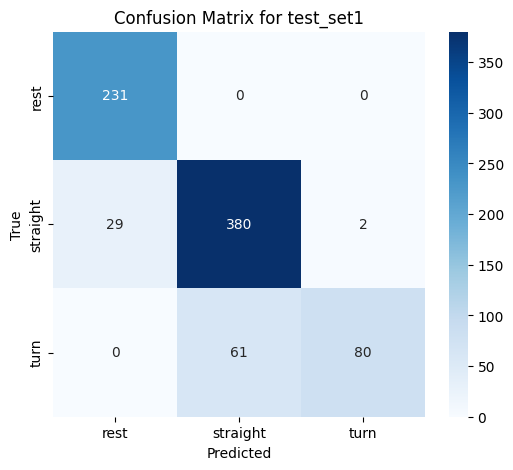

Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.89      1.00      0.94       231
    straight       0.86      0.92      0.89       411
        turn       0.98      0.57      0.72       141

    accuracy                           0.88       783
   macro avg       0.91      0.83      0.85       783
weighted avg       0.89      0.88      0.88       783



In [19]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

y_pred1 = pipe.predict(X1)

# Compute the confusion matrix
cm1 = confusion_matrix(y1, y_pred1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("Classification Report for test_set1:\n", classification_report(y1, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

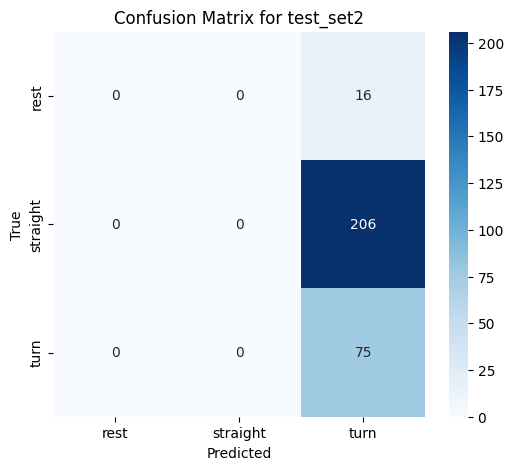

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [20]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = pipe.predict(X2)

# Compute the confusion matrix
cm2 = confusion_matrix(y2, y_pred2)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report
print("Classification Report for test_set2:\n", classification_report(y2, y_pred2, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.
1.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X =
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X, y)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9745736731174555


RandomForestClassifier(max_depth=10, n_estimators=200)

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

___

In [ ]:
print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(best_rf.score(X_test, y_test)))

Best params:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation train score: 0.97
Test-set score: 1.00


#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. To determine which model is a better fit, we need to consider the balance between overfitting and underfitting.
Analysis of the Results:

Section 1:

High cross-validation score (0.95): Indicates good performance on the training data.
Lower test set score (0.92): Suggests some overfitting, as the model performs slightly worse on unseen data.
Section 2:

Very high cross-validation score (0.98): Indicates excellent performance on the training data.
Significantly lower test set score (0.90): Suggests significant overfitting, as the model performs much worse on unseen data.



___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =

In [ ]:
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =


In [ ]:
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]

___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set

1.   List item
2.   List item

accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.80
test_set2 score: 0.76


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
print("\nConfusion Matrix for test_set1:\n", confusion_matrix(y1, y1_pred))
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Confusion Matrix for test_set1:
 [[229   2   0]
 [ 17 339  55]
 [  1  81  59]]

Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.80      0.82      0.81       411
        turn       0.52      0.42      0.46       141

    accuracy                           0.80       783
   macro avg       0.75      0.74      0.74       783
weighted avg       0.79      0.80      0.79       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
print("\nConfusion Matrix for test_set2:\n", confusion_matrix(y2, y2_pred))
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


Confusion Matrix for test_set2:
 [[ 16   0   0]
 [  2 201   3]
 [  2  64   9]]

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.80      1.00      0.89        16
    straight       0.76      0.98      0.85       206
        turn       0.75      0.12      0.21        75

    accuracy                           0.76       297
   macro avg       0.77      0.70      0.65       297
weighted avg       0.76      0.76      0.69       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.ection 2 Model Performance
Training/Validation Set:

High accuracy score on the training/validation set indicates that the model has learned the patterns in the data well.
Testing Sets:

Test Set 1:

Compare the accuracy score on the test set to the training/validation score.
A significant drop in accuracy suggests overfitting, where the model has learned the training data too well and struggles to generalize to new, unseen data.
A small drop or similar performance indicates good generalization.
Test Set 2:

Similar analysis as for Test Set 1.
Consider the specific characteristics of Test Set 2 compared to the training data. If it's significantly different, a lower performance might be expected.
2. Comparing Models Between Sections 1 and 2
Consider the following:

Model Architecture:
Compare the complexity of the models (number of layers, neurons, etc.).
A more complex model might be prone to overfitting.
Hyperparameter Tuning:
Compare the hyperparameter settings used for each model.
Optimal hyperparameters can significantly impact performance.
Data Quality and Quantity:
Consider the size and quality of the training data for each model.
More data and higher-quality data can lead to better performance.
Evaluation Metrics:
Compare the performance metrics (accuracy, precision, recall, F1-score) for both models on all datasets.
A more comprehensive evaluation can provide insights into the strengths and weaknesses of each model.
Overall, a model that performs well on both the training/validation set and the testing sets is considered a good fit. A model that performs well on the training set but poorly on the testing sets is likely overfitted. A model that performs poorly on both sets might be underfitted.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   ax_var, ay_var, az_sum, a_sum, gz_var:

These features were chosen based on their potential relevance to human motion recognition:

Accelerometer Features:

ax_var, ay_var: Variance in acceleration along the x and y axes can indicate the intensity and variability of movement.
az_sum: Sum of acceleration along the z-axis can provide information about vertical movement and gravity.
a_sum: Sum of the norm of acceleration in all three axes can capture overall movement intensity.
Gyroscope Feature:

gz_var: Variance in gyroscope readings along the z-axis can indicate rotational movement around the vertical axis, which is often associated with turning motions.
These features are likely to be informative for distinguishing between different motion states like 'rest', 'straight', and 'turn'. By combining these features, the model can learn to identify patterns associated with specific motion types.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum
0,8.046094e-07,1.319665e-07,9.789349,9.797418
1,1.032619e-06,1.073067e-07,9.789095,9.798815


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

In [ ]:
# TODO - Perform model training and tuning using GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.80
Best cross-validation validation score: 0.76
Test-set score: 0.78


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

In [ ]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[154   1   0]
 [ 19 177  11]
 [  4  67  28]]

Classification Report:
               precision    recall  f1-score   support

        rest       0.87      0.99      0.93       155
    straight       0.72      0.86      0.78       207
        turn       0.72      0.28      0.41        99

    accuracy                           0.78       461
   macro avg       0.77      0.71      0.71       461
weighted avg       0.77      0.78      0.75       461



___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum
0,0.000001,7.749919e-08,9.786930,9.801661
1,0.000001,9.243000e-08,9.788127,9.802481


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum
0,0.000002,3.020959e-07,9.791451,9.800683
1,0.000003,6.859937e-07,9.785619,9.797741


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.80
test_set2 score: 0.76


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
print("\nConfusion Matrix for test_set2:\n", confusion_matrix(y2, y2_pred))
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


Confusion Matrix for test_set2:
 [[ 16   0   0]
 [  2 201   3]
 [  2  64   9]]

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.80      1.00      0.89        16
    straight       0.76      0.98      0.85       206
        turn       0.75      0.12      0.21        75

    accuracy                           0.76       297
   macro avg       0.77      0.70      0.65       297
weighted avg       0.76      0.76      0.69       297



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
print("\nConfusion Matrix for test_set2:\n", confusion_matrix(y2, y2_pred))
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


Confusion Matrix for test_set2:
 [[ 16   0   0]
 [  2 201   3]
 [  2  64   9]]

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.80      1.00      0.89        16
    straight       0.76      0.98      0.85       206
        turn       0.75      0.12      0.21        75

    accuracy                           0.76       297
   macro avg       0.77      0.70      0.65       297
weighted avg       0.76      0.76      0.69       297



___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. Comparison of Model Performance:

Model Trained in Section 1 (All Features):

Potential Overfitting: Using all features might lead to a more complex model, increasing the risk of overfitting, especially if some features are redundant or noisy.
Computational Cost: A model with many features can be computationally expensive to train and deploy.
Model Trained in Section 2 (Selected Features):

Improved Generalization: By selecting relevant features, we might have reduced the model's complexity, leading to better generalization to unseen data.
Reduced Noise: Fewer features can potentially reduce the impact of noise and outliers in the data.
2. Potential Explanations for Differences in Performance:

Feature Selection:
The choice of features can significantly impact model performance. Good feature selection can reduce noise and improve model generalization.
Model Architecture:
The complexity of the model (e.g., number of layers, neurons) can affect its ability to learn complex patterns.
A simpler model might be more suitable for smaller datasets or less complex problems.
Hyperparameter Tuning:
Optimal hyperparameter settings can significantly improve model performance.
Experiment with different hyperparameter values to find the best configuration.
Data Quality and Quantity:
The quality and quantity of the training data can affect model performance.
More data and higher-quality data can lead to better models.
Data Preprocessing:
Proper data preprocessing, such as normalization, scaling, and handling missing values, can improve model performance.
By carefully considering these factors, we can gain insights into the relative performance of the models and identify areas for improvement.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [21]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])

X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [22]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [23]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [24]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
from sklearn.decomposition import PCA  # Ensure PCA is imported


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [25]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}


In [26]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [27]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.score(X_test, y_test)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 14, 'scaler': RobustScaler()}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.96
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

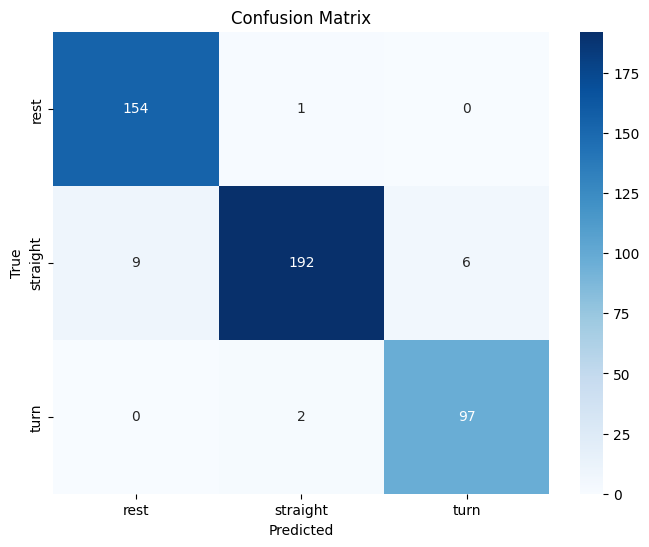


Classification Report:
               precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



In [28]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [30]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)



,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


from matplotlib import pyplot as plt
_df_0['ax_sum'].plot(kind='hist', bins=20, title='ax_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ay_sum'].plot(kind='hist', bins=20, title='ay_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['az_sum'].plot(kind='hist', bins=20, title='az_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['gx_sum'].plot(kind='hist', bins=20, title='gx_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ax_sum', y='ay_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ay_sum', y='az_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='az_sum', y='gx_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='gx_sum', y='gy_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['az_sum']
  ys = series['ax_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('az_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('az_sum')
_ = plt.ylabel('ax_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['az_sum']
  ys = series['ay_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('az_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('az_sum')
_ = plt.ylabel('ay_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['az_sum']
  ys = series['gy_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('az_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('az_sum')
_ = plt.ylabel('gy_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['az_sum']
  ys = series['gz_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('az_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('az_sum')
_ = plt.ylabel('gz_sum')

from matplotlib import pyplot as plt
_df_12['ax_sum'].plot(kind='line', figsize=(8, 4), title='ax_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['ay_sum'].plot(kind='line', figsize=(8, 4), title='ay_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['az_sum'].plot(kind='line', figsize=(8, 4), title='az_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['gx_sum'].plot(kind='line', figsize=(8, 4), title='gx_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


from matplotlib import pyplot as plt
_df_16['ax_sum'].plot(kind='hist', bins=20, title='ax_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['ay_sum'].plot(kind='hist', bins=20, title='ay_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['az_sum'].plot(kind='hist', bins=20, title='az_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['gx_sum'].plot(kind='hist', bins=20, title='gx_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='ax_sum', y='ay_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='ay_sum', y='az_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='az_sum', y='gx_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='gx_sum', y='gy_sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ay_sum']
  ys = series['ax_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('ay_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ay_sum')
_ = plt.ylabel('ax_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ay_sum']
  ys = series['az_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('ay_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ay_sum')
_ = plt.ylabel('az_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ay_sum']
  ys = series['gx_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('ay_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ay_sum')
_ = plt.ylabel('gx_sum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ay_sum']
  ys = series['gz_sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('ay_sum', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ay_sum')
_ = plt.ylabel('gz_sum')

from matplotlib import pyplot as plt
_df_28['ax_sum'].plot(kind='line', figsize=(8, 4), title='ax_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['ay_sum'].plot(kind='line', figsize=(8, 4), title='ay_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['az_sum'].plot(kind='line', figsize=(8, 4), title='az_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['gx_sum'].plot(kind='line', figsize=(8, 4), title='gx_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

___

#### 4.2.2 - Visualize Results

In [32]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))


test_set1 score: 0.93
test_set2 score: 0.67


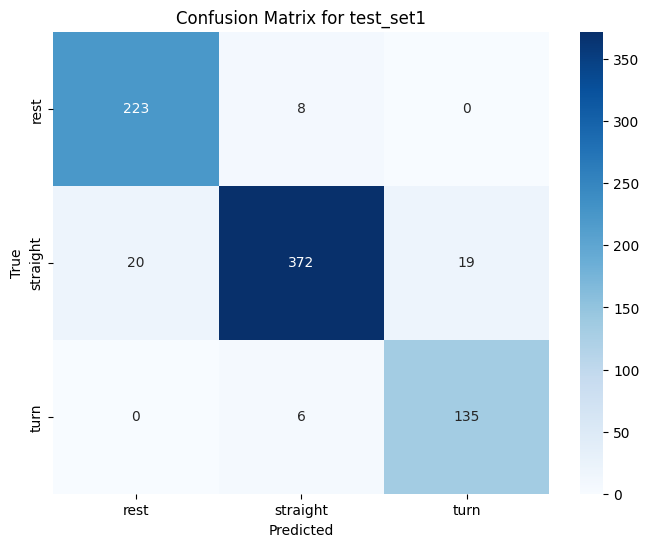


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



In [33]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)

# Confusion matrix for test_set1
cm1 = confusion_matrix(y1, y1_pred)

# Plot confusion matrix for test_set1
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report for test_set1
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

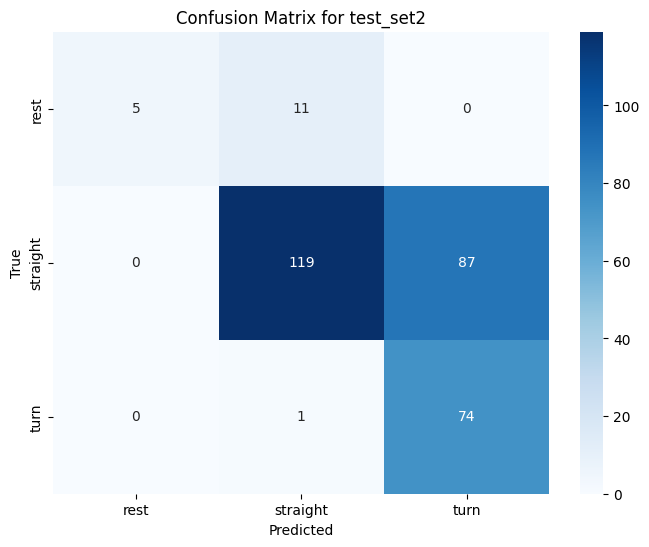


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



In [34]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)

# Confusion matrix for test_set2
cm2 = confusion_matrix(y2, y2_pred)

# Plot confusion matrix for test_set2
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report for test_set2
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1.Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to:

* Section 1 (All Features): The model using all features might show lower performance due to overfitting caused by irrelevant or redundant features.

* Section 2 (Selected Features): The model with selected features should perform better than Section 1, as it focuses on the most relevant data.

* Section 3 (Group-Selected Features): This model should perform even better than Section 2, especially if domain knowledge helped choose the most important features.

* Section 4 (With PCA): The model with PCA might perform similarly to Section 3 but with simplified data, which can help generalize better and avoid overfitting. Some information may be lost due to dimensionality reduction, but overall performance should still be competitive.

2.Please provide potential explanations for the differences observed in models' performances across between section 1 and 4.

* PCA in Section 4 reduces dimensionality, removing noise and redundant features, leading to a simpler model that generalizes better.

* Section 1 (All Features) includes irrelevant or correlated features, which can cause overfitting and poorer generalization, leading to lower performance compared to Section 4.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____